<a href="https://colab.research.google.com/github/ronaknavadiya/pytorch-projects-practice-/blob/main/torch_nn_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create below neural network using nn.module

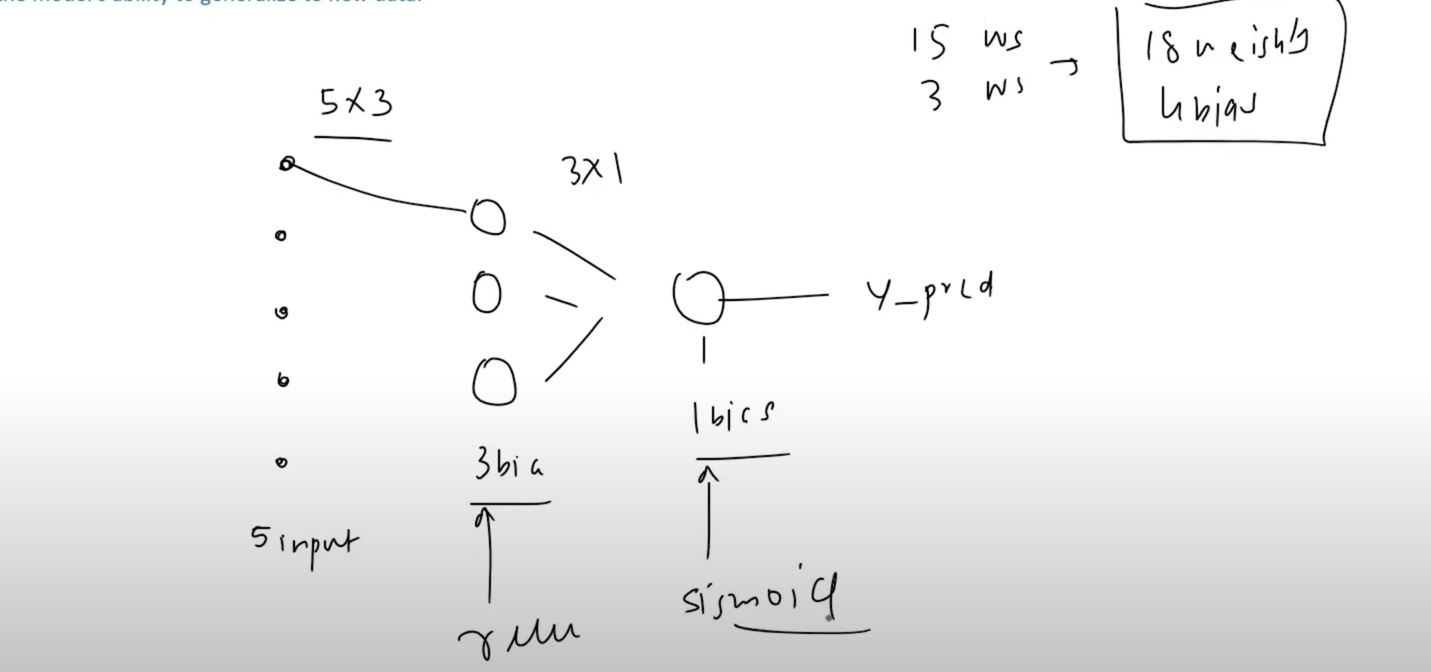

In [1]:
# create model

import torch
import torch.nn as nn



In [7]:
class Model(nn.Module):

  def __init__(self, input_features):
    super().__init__()

    self.linear1 = nn.Linear(input_features,3)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(3,1)
    self.sigmoid = nn.Sigmoid()


  def forward(self, features):
    out = self.linear1(features)
    out = self.relu(out)
    out = self.linear2(out)
    out = self.sigmoid(out)

    return out



In [9]:
#  create daatset

features = torch.rand(10,5)

model = Model(features.shape[1])

# forward
model(features)

tensor([[0.4391],
        [0.4125],
        [0.4213],
        [0.4352],
        [0.4160],
        [0.4368],
        [0.4310],
        [0.4099],
        [0.4411],
        [0.4160]], grad_fn=<SigmoidBackward0>)

In [10]:
!pip install torchinfo

In [20]:
from torchinfo import summary

summary(model, input_size=(10,5))   # 10 rows , 5 columns ( 5 features )

Layer (type:depth-idx)                   Output Shape              Param #
Model                                    [10, 1]                   --
├─Linear: 1-1                            [10, 3]                   18
├─ReLU: 1-2                              [10, 3]                   --
├─Linear: 1-3                            [10, 1]                   4
├─Sigmoid: 1-4                           [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [18]:
print(model.linear1.weight)

print(model.linear1.bias)

Parameter containing:
tensor([[-0.0137,  0.3377,  0.3655, -0.0159, -0.4424],
        [ 0.1303,  0.3111,  0.2500,  0.1610, -0.1901],
        [ 0.4069,  0.0427,  0.1074,  0.2832, -0.2950]], requires_grad=True)
Parameter containing:
tensor([-0.3970, -0.3697, -0.0582], requires_grad=True)


In [17]:
print(model.linear2.weight)

print(model.linear2.bias)

Parameter containing:
tensor([[ 0.0913, -0.1534, -0.1554]], requires_grad=True)
Parameter containing:
tensor([-0.2366], requires_grad=True)


## Model with Sequencial layer

In [26]:
class Seq_Model(nn.Module):

  def __init__(self, input_features):
    super().__init__()

    self.network = nn.Sequential(
        nn.Linear(input_features,3),
        nn.ReLU(),
        nn.Linear(3,1),
        nn.Sigmoid()
    )


  def forward(self, features):
    out = self.network(features)

    return out

In [28]:
features2 = torch.rand(10,5)

model2 = Seq_Model(features2.shape[1])

# forward
model2(features2)

tensor([[0.5506],
        [0.5330],
        [0.5357],
        [0.5339],
        [0.5339],
        [0.5552],
        [0.5348],
        [0.5302],
        [0.5288],
        [0.5245]], grad_fn=<SigmoidBackward0>)

In [29]:
from torchinfo import summary

summary(model2, input_size=(10,5))   # 10 rows , 5 columns ( 5 features )

Layer (type:depth-idx)                   Output Shape              Param #
Seq_Model                                [10, 1]                   --
├─Sequential: 1-1                        [10, 1]                   --
│    └─Linear: 2-1                       [10, 3]                   18
│    └─ReLU: 2-2                         [10, 3]                   --
│    └─Linear: 2-3                       [10, 1]                   4
│    └─Sigmoid: 2-4                      [10, 1]                   --
Total params: 22
Trainable params: 22
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00